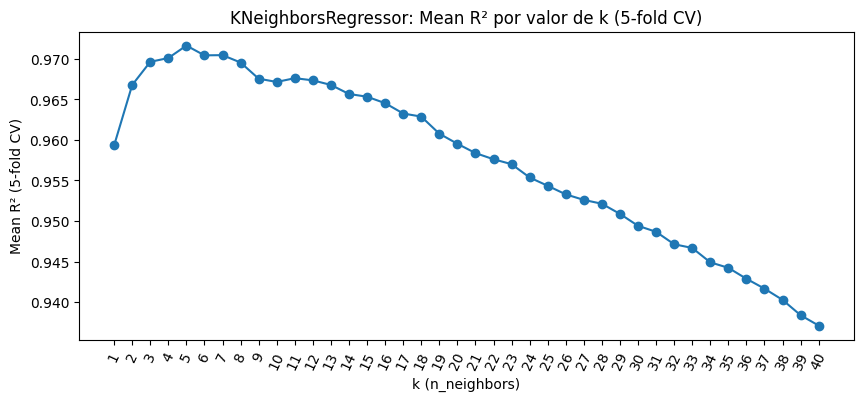

Mejor k según R² medio (5-fold CV): k = 5  →  mean R2 = 0.9716 (std = 0.0100)

Top 8 mejores k (ordenadas por mean R2):

 k  mean_r2   std_r2
 5 0.971626 0.009957
 7 0.970448 0.010072
 6 0.970421 0.009297
 4 0.970090 0.010836
 3 0.969624 0.012129
 8 0.969536 0.010662
11 0.967606 0.010814
 9 0.967543 0.010781


In [ ]:
# Encontrar k óptimo para KNeighborsRegressor (Actividad 2.14)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Cargar iris desde sklearn
iris = load_iris(as_frame=True)
df = iris.frame.copy()

# Objetivo: predecir 'petal length (cm)' usando los otros tres atributos numéricos
target_col = 'petal length (cm)'
X = df.drop(columns=[target_col, 'target'])  # removemos la columna de clase 'target'
y = df[target_col]

RANDOM_SEED = 85
cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

k_values = range(1, 41)
mean_r2_scores = []
std_r2_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    fold_scores = []
    for train_idx, test_idx in cv.split(X, y):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        y_pred = model.predict(X.iloc[test_idx])
        fold_scores.append(r2_score(y.iloc[test_idx], y_pred))
    mean_r2_scores.append(np.mean(fold_scores))
    std_r2_scores.append(np.std(fold_scores))

# DataFrame con resultados
results_df = pd.DataFrame({
    'k': list(k_values),
    'mean_r2': mean_r2_scores,
    'std_r2': std_r2_scores
})

# Mostrar los mejores k
top_results = results_df.sort_values('mean_r2', ascending=False).head(8)

# Gráfico: mean R2 vs k
plt.figure(figsize=(10,4))
plt.xticks(np.arange(1, len(k_values)+1, step=1))
plt.plot(results_df['k'], results_df['mean_r2'], marker='o')
plt.xlabel("k (n_neighbors)")
plt.ylabel("Mean R\u00b2 (5-fold CV)")
plt.title("KNeighborsRegressor: Mean R\u00b2 por valor de k (5-fold CV)")
plt.gca().tick_params(axis='x', labelrotation=65)
plt.grid(False)
plt.show()

# Resumen
best_row = results_df.loc[results_df['mean_r2'].idxmax()]
print(f"Mejor k según R\u00b2 medio (5-fold CV): k = {int(best_row['k'])}  →  mean R2 = {best_row['mean_r2']:.4f} (std = {best_row['std_r2']:.4f})\n")
print("Top 8 mejores k (ordenadas por mean R2):\n")
print(top_results.to_string(index=False))
